In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
print('X_train',X_train.shape)
print('y_test',y_test.shape)

X_train (8000, 11)
y_test (2000,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [21]:
model = Sequential()
# Adding an input Layer
model.add(Dense(11,activation='relu',input_dim = 11))
#adding a hiddden layer
model.add(Dense(11,activation='relu'))
# Adding an output layer
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.7080 - val_loss: 0.4872 - val_accuracy: 0.7944
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7973 - val_loss: 0.4517 - val_accuracy: 0.8019
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8094 - val_loss: 0.4380 - val_accuracy: 0.8119
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8184 - val_loss: 0.4298 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8213 - val_loss: 0.4204 - val_accuracy: 0.8181
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8317 - val_loss: 0.3998 - val_accuracy: 0.8344
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8414 - val_loss: 0.3830 - val_accuracy: 0.8413

In [25]:
model.layers[0].get_weights()

[array([[ 0.13053223,  0.12914278, -0.37801307,  0.01229558,  0.28835347,
         -0.4499363 ,  0.20176074, -0.09369484,  0.45509553,  0.5464136 ,
          0.17084225],
        [-0.02330114,  0.10883196, -0.3491359 , -0.8402538 , -0.20216125,
         -0.33390927,  0.5739194 ,  0.23057893,  0.5422255 ,  0.3579873 ,
         -0.8007745 ],
        [-0.04282306, -0.02968858, -0.0418404 , -0.11825431,  0.00201348,
          0.63923067, -0.10302313, -0.77058107,  0.14458916, -0.46774763,
         -0.10945909],
        [-0.78941923,  0.05212396,  0.3844572 , -0.14808019,  0.4305799 ,
         -0.21700661, -0.88770676, -0.8655627 , -0.29595575, -0.15534894,
          0.14565338],
        [-0.7302509 ,  0.9285512 , -0.3717536 ,  0.27778685, -1.0774105 ,
          0.06493584,  0.2461437 , -0.08546425, -0.40532005,  0.29714265,
         -0.28001422],
        [ 0.00598775,  0.03928742, -0.01787826, -0.16126755, -0.01736491,
          0.37147355,  0.33784625, -0.45886335, -0.38967785, -0.4415197

In [26]:
model.layers[1].get_weights()

[array([[-0.40561903,  0.56825906, -0.13271655, -0.13053103,  0.49946398,
          0.15897052, -0.69881165, -0.74906355, -1.0313799 ,  0.09109779,
          0.20772946],
        [ 0.91845715,  0.2994021 , -0.15907905,  0.6619406 ,  0.34706965,
          0.38133374,  0.82591575, -0.53659093, -0.22343174,  0.45391238,
          0.56916904],
        [-0.25359887, -0.44392008, -0.5601313 ,  0.04539117, -0.31161612,
         -0.27735847, -0.21078528, -0.28330877, -0.28281003,  0.37699685,
          0.09873884],
        [-0.21032728, -0.4915362 ,  0.44119185, -0.21607198,  0.06207016,
          0.00567779, -0.08640074,  0.44891873, -0.10406357, -0.71119684,
         -1.1926172 ],
        [-0.8572055 ,  0.30222037, -0.43937117, -0.27221596,  0.24082732,
         -0.1232284 , -1.0659769 , -0.08435638,  0.15293734,  0.5321166 ,
          0.54848963],
        [ 0.01845667,  0.29752153,  0.00598678, -0.04977222,  0.22037823,
          0.08970706,  0.23322846,  0.381379  ,  0.31940117, -0.1076843

In [27]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

In [30]:
import matplotlib.pyplot as plt

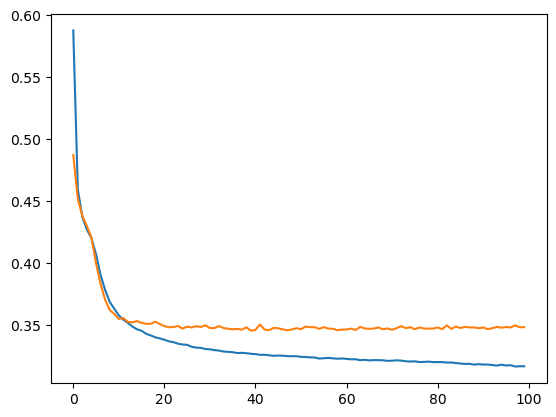

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

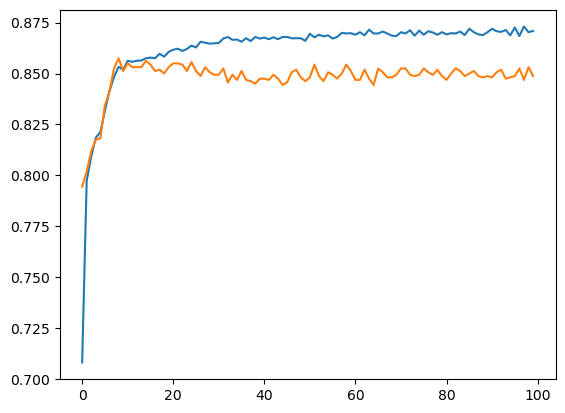

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])